In [1]:
#https://github.com/lukepolson/youtube_channel/blob/main/Python%20Metaphysics%20Series/vid12.ipynb


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, quad_vec
import plotly.graph_objects as go
from IPython.display import HTML
import sympy as smp
from sympy.vector import cross


[{'d': 'M30.4764 14.5500 L35.4764 14.5500 '}, {'d': 'M30.4764 15.8500 L35.4764 15.8500 '}, {'d': 'M30.4764 15.8500 A0.2000 0.2000 0.0 0 0 30.2767 16.0389'}, {'d': 'M30.2767 14.3611 A15.1000 15.1000 0.0 1 0 30.2767 16.0389'}, {'d': 'M30.2767 14.3611 A0.2000 0.2000 0.0 0 0 30.4764 14.5500'}]


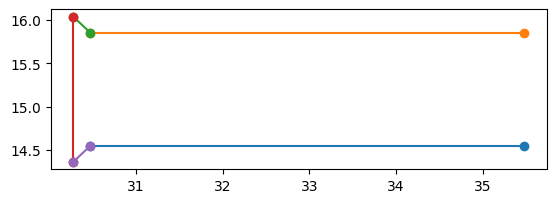

In [3]:
import matplotlib.pyplot as plt
from svgpathtools import svg2paths
from svgpathtools import parse_path

import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from svgpathtools import parse_path


# Load the SVG file
path, attributes = svg2paths('coil.svg')

print(attributes)

def extract_coordinates(paths):
    coordinates = []
    for path_string in paths:
        path = parse_path(path_string)
        path_coords = []
        for segment in path:
            path_coords.append((segment.start.real, segment.start.imag))
            path_coords.append((segment.end.real, segment.end.imag))
            if hasattr(segment, 'control1'):
                path_coords.append((segment.control1.real, segment.control1.imag))
            if hasattr(segment, 'control2'):
                path_coords.append((segment.control2.real, segment.control2.imag))
        coordinates.append(path_coords)
    return coordinates

def plot_coordinates(coordinates):
    fig, ax = plt.subplots()
    for path_coords in coordinates:
        xs, ys = zip(*path_coords)
        ax.plot(xs, ys, marker='o')
    ax.set_aspect('equal')
    plt.show()
    



# Extract coordinates from the path data
coordinates = extract_coordinates(path)

# Plot the coordinates using matplotlib
plot_coordinates(coordinates)


In [60]:
#lx, ly, lz = l(phi)



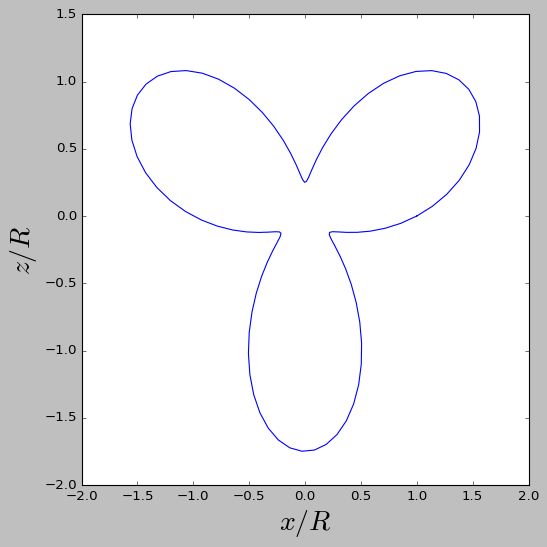

In [74]:
plt.figure(figsize=(7,7))
plt.plot(lx, ly)
plt.xlabel('$x/R$', fontsize=25)
plt.ylabel('$z/R$', fontsize=25)
plt.show()

In [62]:
t, x, y, z = smp.symbols('t, x, y, z')

In [63]:
l = (1+(3/4)*smp.sin(3*t))*smp.Matrix([smp.cos(t), smp.sin(t), 0])
#l = smp.Matrix([smp.cos(t), smp.sin(t), (t-smp.pi)/smp.pi])
r = smp.Matrix([x, y, z])
sep = r-l

In [64]:
integrand = smp.diff(l, t).cross(sep) / sep.norm()**3

In [65]:
integrand

Matrix([
[                                                                                                                          z*((0.75*sin(3*t) + 1)*cos(t) + 2.25*sin(t)*cos(3*t))/(Abs(z)**2 + Abs(x - (0.75*sin(3*t) + 1)*cos(t))**2 + Abs(y - (0.75*sin(3*t) + 1)*sin(t))**2)**(3/2)],
[                                                                                                                        -z*(-(0.75*sin(3*t) + 1)*sin(t) + 2.25*cos(t)*cos(3*t))/(Abs(z)**2 + Abs(x - (0.75*sin(3*t) + 1)*cos(t))**2 + Abs(y - (0.75*sin(3*t) + 1)*sin(t))**2)**(3/2)],
[(-(x - (0.75*sin(3*t) + 1)*cos(t))*((0.75*sin(3*t) + 1)*cos(t) + 2.25*sin(t)*cos(3*t)) + (y - (0.75*sin(3*t) + 1)*sin(t))*(-(0.75*sin(3*t) + 1)*sin(t) + 2.25*cos(t)*cos(3*t)))/(Abs(z)**2 + Abs(x - (0.75*sin(3*t) + 1)*cos(t))**2 + Abs(y - (0.75*sin(3*t) + 1)*sin(t))**2)**(3/2)]])

In [66]:
dBxdt = smp.lambdify([t, x, y, z], integrand[0])
dBydt = smp.lambdify([t, x, y, z], integrand[1])
dBzdt = smp.lambdify([t, x, y, z], integrand[2])

In [67]:
def B(x, y, z):
    return np.array([quad_vec(dBxdt, 0, 2*np.pi, args=(x, y, z))[0],
                     quad_vec(dBydt, 0, 2*np.pi, args=(x, y, z))[0],
                     quad_vec(dBzdt, 0, 2*np.pi, args=(x, y, z))[0]])

In [68]:
x = np.linspace(-2, 2, 20)
xv, yv, zv = np.meshgrid(x, x, x)


In [69]:
B_field = B(xv, yv, zv)
Bx, By, Bz = B_field


In [70]:
Bx[Bx>20] = 20
By[By>20] = 20
Bz[Bz>20] = 20

Bx[Bx<-20] = -20
By[By<-20] = -20
Bz[Bz<-20] = -20


In [73]:
data = go.Cone(x=xv.ravel(), y=yv.ravel(), z=zv.ravel(),
               u=Bx.ravel(), v=By.ravel(), w=Bz.ravel(),
               colorscale='Inferno', colorbar=dict(title='$x^2$'),
               sizemode="absolute", sizeref=20)

layout = go.Layout(title=r'Plot Title',
                     scene=dict(xaxis_title=r'x',
                                yaxis_title=r'y',
                                zaxis_title=r'z',
                                aspectratio=dict(x=1, y=1, z=1),
                                camera_eye=dict(x=1.2, y=1.2, z=1.2)))

fig = go.Figure(data = data, layout=layout)
fig.add_scatter3d(x=lx, y=ly, z=lz, mode='lines',
                  line = dict(color='green', width=10))


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'colorbar': {'title': {'text': '$x^2$'}},
              'colorscale': [[0.0, '#000004'], [0.1111111111111111, '#1b0c41'],
                             [0.2222222222222222, '#4a0c6b'], [0.3333333333333333,
                             '#781c6d'], [0.4444444444444444, '#a52c60'],
                             [0.5555555555555556, '#cf4446'], [0.6666666666666666,
                             '#ed6925'], [0.7777777777777778, '#fb9b06'],
                             [0.8888888888888888, '#f7d13d'], [1.0, '#fcffa4']],
              'sizemode': 'absolute',
              'sizeref': 20,
              'type': 'cone',
              'u': array([0.10170023, 0.11196741, 0.12117806, ..., 0.12306536, 0.11098158,
                          0.09914504]),
              'v': array([0.09074352, 0.09825335, 0.10440427, ..., 0.14409402, 0.12740828,
                          0.1117954 ]),
              'w': array([ 0.01359401, -0.00043378, -0.01912509, ...,  0.00610805,  0.02186449,
                           0.03223065]),
              'x': array([-2., -2., -2., ...,  2.,  2.,  2.]),
              'y': array([-2., -2., -2., ...,  2.,  2.,  2.]),
              'z': array([-2.        , -1.78947368, -1.57894737, ...,  1.57894737,  1.78947368,
                           2.        ])},
             {'line': {'color': 'green', 'width': 10},
              'mode': 'lines',
              'type': 'scatter3d',
              'x': array([ 1.        ,  1.13963934,  1.26845908,  1.38008175,  1.46891951,
                           1.53049993,  1.56172281,  1.56103238,  1.52849408,  1.46577162,
                           1.37600605,  1.2636049 ,  1.13395531,  0.99307943,  0.84725463,
                           0.7026226 ,  0.56481244,  0.43860191,  0.32763806,  0.23423517,
                           0.15926238,  0.1021279 ,  0.06086038,  0.03228156,  0.01225872,
                          -0.00397997, -0.02148794, -0.04522424, -0.07968373, -0.12855782,
                          -0.19444825, -0.27865264, -0.38103649, -0.5       , -0.63254261,
                          -0.77442147, -0.92039407, -1.06452971, -1.20057032, -1.32231738,
                          -1.4240204 , -1.50074212, -1.54867674, -1.56540089, -1.55004088,
                          -1.50334528, -1.4276578 , -1.3267919 , -1.20581456, -1.07075268,
                          -0.9282404 , -0.78512929, -0.64808587, -0.52320177, -0.41564067,
                          -0.32934436, -0.26681603, -0.22899416, -0.21522471, -0.22333276,
                          -0.24978881, -0.28995858, -0.33842006, -0.3893274 , -0.4367979 ,
                          -0.47529752, -0.5       , -0.50709673, -0.49403761, -0.45968768,
                          -0.4043898 , -0.32992961, -0.23940544, -0.13701198, -0.02775196,
                           0.08290512,  0.18939484,  0.28643598,  0.36938997,  0.43457837,
                           0.47953727,  0.50319196,  0.50594024,  0.48963849,  0.45749122,
                           0.4138507 ,  0.36393939,  0.31351277,  0.26848398,  0.23453447,
                           0.21673544,  0.21920468,  0.2448207 ,  0.29501305,  0.3696423 ,
                           0.46697789,  0.58377565,  0.71545054,  0.85633401,  1.        ]),
              'y': array([ 0.00000000e+00,  7.24262114e-02,  1.61879700e-01,  2.65988955e-01,
                           3.81131953e-01,  5.02664652e-01,  6.25219502e-01,  7.43054663e-01,
                           8.50431266e-01,  9.41994223e-01,  1.01313179e+00,  1.06029041e+00,
                           1.08122420e+00,  1.07516256e+00,  1.04288464e+00,  9.86695376e-01,
                           9.10304083e-01,  8.18612762e-01,  7.17427284e-01,  6.13109367e-01,
                           5.12191190e-01,  4.20976934e-01,  3.45156354e-01,  2.89454843e-01,
                           2.57342107e-01,  2.50817921e-01,  2.70288524e-01,  3.14541502e-01,
                           3.80820745e-01,  4.64996726e-01,  5.61821307e-01,  6.65250948e-01,
     